# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [66]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [67]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


AMT_INCOME_TOTAL
std :237123.14627883647, mean :168797.9192969845
AMT_CREDIT
std :402490.776995946, mean :599025.9997057016
AMT_ANNUITY
std :14493.737315117392, mean :27108.573909183444
AMT_GOODS_PRICE
std :369446.4605400129, mean :538396.2074288895
REGION_POPULATION_RELATIVE
std :0.013831280122699869, mean :0.02086811205778947
DAYS_REGISTRATION
std :3522.88632096305, mean :-4986.120327538419
OWN_CAR_AGE
std :11.944811582242346, mean :12.061090818687727
CNT_FAM_MEMBERS
std :0.9106815691773334, mean :2.152665450442101
EXT_SOURCE_1
std :0.21106224927392553, mean :0.5021298056566621
EXT_SOURCE_2
std :0.1910601549849387, mean :0.5143926741308463
EXT_SOURCE_3
std :0.19484436446376072, mean :0.5108529061800121
APARTMENTS_AVG
std :0.10824029130030667, mean :0.11744049917466033
BASEMENTAREA_AVG
std :0.08243815873569478, mean :0.08844221905180052
YEARS_BEGINEXPLUATATION_AVG
std :0.05922331435835884, mean :0.9777348581622732
YEARS_BUILD_AVG
std :0.11327992663225028, mean :0.752471432592686
COMMO

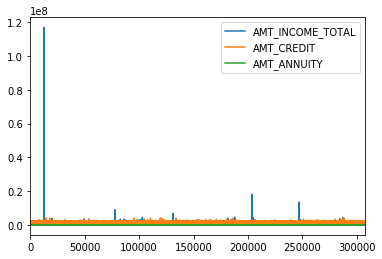

In [118]:
# 挑選出Type為 int, float的feature

dType_df = app_train.dtypes.reset_index()
dType_df.columns = ['Count', 'Column Type']

IntFeatureList = []
FloatFeatureList = []

for Feature, dType in zip(dType_df['Count'], dType_df['Column Type']):
    if dType == 'int64':
        #print('11111')
        IntFeatureList.append(Feature)
    elif dType == 'float64':
        FloatFeatureList.append(Feature)

# 
for IntFeature, FloatFeature in zip(IntFeatureList, FloatFeatureList):
    #print(f'{IntFeature}\nstd :{app_train[IntFeature].std()}, mean :{app_train[IntFeature].mean()}')
    print(f'{FloatFeature}\nstd :{app_train[FloatFeature].std()}, mean :{app_train[FloatFeature].mean()}')


# 將要Plot出來的Feature合併至一個DataFrame
Plot_df = pd.DataFrame()
for i in range(3):
    Plot_df = pd.concat([Plot_df, app_train[FloatFeatureList[i]]], axis=1)
    #print(Plot_df.head())

print(Plot_df.shape)
Plot_df.plot()

In [119]:
INCOME_TOTALArray = pd.Series(Plot_df['AMT_INCOME_TOTAL'])
max_Index = INCOME_TOTALArray.idxmax()
print(max_Index)
dType_df = app_train.loc[max_Index]
dType_df

12840


SK_ID_CURR                                           114967
TARGET                                                    1
NAME_CONTRACT_TYPE                               Cash loans
CODE_GENDER                                               F
FLAG_OWN_CAR                                              N
FLAG_OWN_REALTY                                           Y
CNT_CHILDREN                                              1
AMT_INCOME_TOTAL                                   1.17e+08
AMT_CREDIT                                           562491
AMT_ANNUITY                                         26194.5
AMT_GOODS_PRICE                                      454500
NAME_TYPE_SUITE                               Unaccompanied
NAME_INCOME_TYPE                                    Working
NAME_EDUCATION_TYPE           Secondary / secondary special
NAME_FAMILY_STATUS                                  Married
NAME_HOUSING_TYPE                         House / apartment
REGION_POPULATION_RELATIVE              